In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [6]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [7]:
len(X_train)


60000

In [8]:
len(X_test)


10000

In [9]:
X_train[0].shape


(28, 28)

In [16]:
X_train = X_train/255
X_test = X_test/255

X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

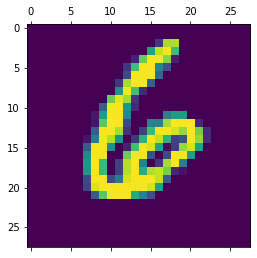

In [17]:
plt.matshow(X_train[13])

In [18]:
y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
y_train[0:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

In [20]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape,X_test_flattened.shape

((60000, 784), (10000, 784))

In [21]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
 
model.compile(
    optimizer= 'adam',
    loss='sparse_categorical_crossentropy',
    metrics= ['accuracy']
)


model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 973us/step - loss: 0.4713 - accuracy: 0.8763
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3038 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 2s 836us/step - loss: 0.2831 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 2s 852us/step - loss: 0.2734 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 2s 836us/step - loss: 0.2663 - accuracy: 0.9259


model.evaluate(X_test_flattened,y_test)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2620 - accuracy: 0.9273
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2583 - accuracy: 0.9281
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2556 - accuracy: 0.9291
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2528 - accuracy: 0.9302
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2514 - accuracy: 0.9305


In [23]:
model.evaluate(X_test_flattened,y_test)


313/313 [==============================] - 0s 968us/step - loss: 0.2666 - accuracy: 0.9263


[0.26661139726638794, 0.9262999892234802]

In [24]:
y_pred=model.predict(X_test_flattened)

In [25]:
y_pred[3]


array([9.9974555e-01, 1.0298282e-08, 4.1145682e-02, 3.2345951e-03,
       3.8649956e-05, 5.0089031e-02, 8.9208663e-02, 9.8242164e-03,
       8.8341832e-03, 1.2062341e-02], dtype=float32)

In [26]:
np.argmax(y_pred[3])

0

In [28]:
y_test[3]

0

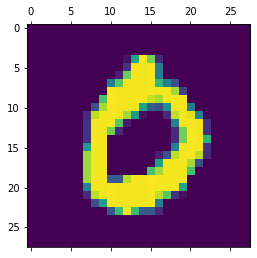

In [29]:
plt.matshow(X_test[3])

In [32]:
y_predicted_labels= [np.argmax(i) for i in y_pred]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [33]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [34]:
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    5,    3,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   8,   10,  922,   21,    9,    3,   12,   12,   31,    4],
       [   5,    0,   15,  925,    0,   22,    2,   12,   23,    6],
       [   1,    1,    4,    2,  926,    0,    9,    7,    8,   24],
       [  11,    2,    1,   35,   10,  777,   13,    9,   29,    5],
       [  14,    3,    5,    1,    7,   14,  911,    1,    2,    0],
       [   2,    7,   22,    3,    7,    1,    0,  959,    1,   26],
       [  10,   12,    6,   21,    9,   30,   10,   14,  853,    9],
       [  11,    7,    1,    8,   32,    6,    0,   31,    6,  907]])>

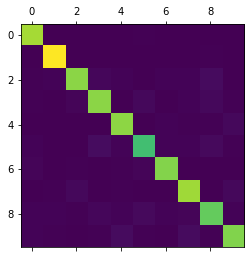

In [35]:
plt.matshow(cm)

Text(69.0, 0.5, 'Truth')

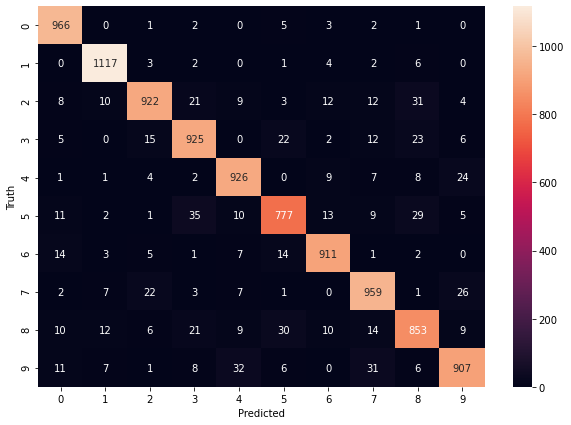

In [42]:
import seaborn as sn
plt.figure(figsize =(10,7))
sn.heatmap(cm ,annot=True ,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
 
model.compile(
    optimizer= 'adam',
    loss='sparse_categorical_crossentropy',
    metrics= ['accuracy']
)


model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2671 - accuracy: 0.9249
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1209 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0854 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0646 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0513 - accuracy: 0.9840


In [44]:
model.evaluate(X_test_flattened,y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9761


[0.08121898770332336, 0.9761000275611877]

In [45]:
y_pred=model.predict(X_test_flattened)

In [46]:
y_predicted_labels= [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

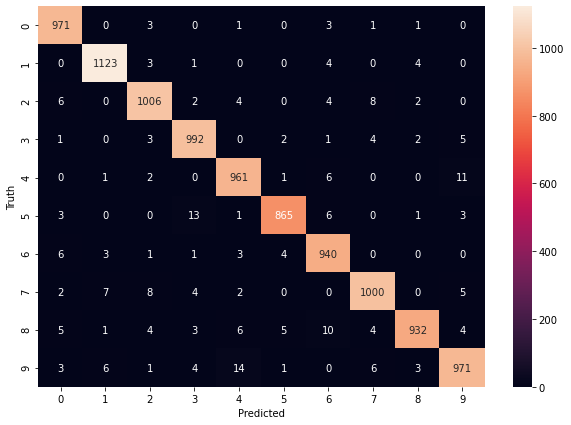

In [47]:
import seaborn as sn
plt.figure(figsize =(10,7))
sn.heatmap(cm ,annot=True ,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import pymongo
req = requests.get("https://www.aqi.in/dashboard/india/delhi/new-delhi")
soup = BeautifulSoup(req.text,features="html5lib")
table = soup('table')[0]
table_rows = table.find_all('tr')
l = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l.append(row)
  
df = pd.DataFrame(l, columns=['Location', 'Status', 'AQI-US', 'PM2.5', 'PM10', 'Temperature','Humidity'])
print(df)
print()

df = df.drop(0)
df

ModuleNotFoundError: No module named 'pymongo'

In [50]:
import requests
from bs4 import BeautifulSoup
import pandas
req = requests.get('https://www.aqi.in/dashboard/india/delhi/new-delhi')
soup = BeautifulSoup(req.text)
arr = []
for i in range(1, len(soup('table')[0].findAll('tr'))):
    dic = {}
    dic['Location'] = soup('table')[0].findAll('tr')[i].findAll('a')[0].string
    dic['Status'] = soup('table')[0].findAll('tr')[i].findAll('td')[0].string
    dic['AQI-US'] = soup('table')[0].findAll('tr')[i].findAll('td')[1].string
    dic['PM2.5'] = soup('table')[0].findAll('tr')[i].findAll('td')[3].string
    dic['PM10'] = soup('table')[0].findAll('tr')[i].findAll('td')[4].string
    dic['Temp'] = soup('table')[0].findAll('tr')[i].findAll('td')[5].string
    dic['Humid'] = soup('table')[0].findAll('tr')[i].findAll('td')[6].string
    arr.append(dic)
db = pandas.DataFrame(arr)
print(db)


                    Location     Status AQI-US PM2.5 PM10 Temp Humid
0                       Loni   MODERATE     87   502  646   34    55
1                ITI Shahdra  HAZARDOUS    448   372  552   29    35
2                Pooth Khurd     SEVERE    362   312  457   28    41
3               Punjabi Bagh     SEVERE    392   331  498   33    42
4         Mother Dairy Plant     SEVERE    351   301  395   28    41
..                       ...        ...    ...   ...  ...  ...   ...
113               Loni Dehat  UNHEALTHY    266   362  512   34    55
114              Surya Nagar  HAZARDOUS    419   325  522   29    35
115         Rohini Sector 10  HAZARDOUS    417   375  528   28    37
116          Rohini Sector 5  HAZARDOUS    419   377  541   28    38
117  Royal norwegian embassy  UNHEALTHY    283   233  296    0     0

[118 rows x 7 columns]
